<a href="https://colab.research.google.com/github/Kenethoriga/DataOpsKit/blob/main/LSTM_Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

In [ ]:
data = {
    "Year": list(range(2000, 2024)),
    "Inflation (%)": [9.98, 5.74, 1.96, 9.82, 11.62, 10.31, 14.49, 9.8, 26.2, 10.3, 4.11, 14.0, 9.38, 5.72, 6.91, 6.58, 6.3, 4.69, 5.19, 5.4, 6.1, 6.5, 7.2, 6.9],
    "Imports (tons)": [18913, 19389, 19261, 25440, 26938, 23967, 23961, 22545, 17645, 16594, 16628, 18182, 19451, 18183, 20051, 21459, 21452, 20124, 24145, 24344, 26867, 29867, 28847, 27309],
    "Cost (Ksh/ton)": [93600, 101400, 109204, 118500, 120000, 124000, 137211, 114332, 149002, 150583, 234742, 280124, 258337, 280434, 288865, 308640, 296718, 267671, 271251, 270477, 245025, 272660, 292978, 305062],
    "Textile Waste (tons)": [4200, 4800, 5100, 6900, 7200, 6000, 5500, 6300, 5800, 4500, 5200, 6700, 7500, 6200, 6800, 7000, 6500, 5900, 8200, 7600, 9300, 8700, 9100, 8400],
    "Avg. Temp (°C)": [21.9, 22.1, 21.7, 21.4, 21.8, 22.3, 22, 21.5, 21.9, 22.6, 21.7, 22.2, 21.4, 22.5, 21.8, 22, 21.3, 22.7, 21.6, 21.9, 21.2, 22.4, 21.5, 22.1],
    "Annual Rainfall (mm)": [278.01, 767.26, 729.67, 613.8, 693.04, 397.73, 717.6, 473.89, 453.68, 408.56, 687.62, 582.9, 810.73, 798.64, 536.07, 801.42, 538.27, 352.55, 1043.19, 937.54, 1107.96, 610.92, 403.99, 448.47],
    "Key Event": [
        "Limited recycling infrastructure", "Drought reduces waste dumping", "Introduction of first landfill regulations",
        "Severe floods wash textiles into rivers", "Dandora landfill experiences significant overflows",
        "UNEP launches anti-dumping campaign", "Ban on textile burning implemented",
        "Community-led Kibera cleanup initiative launched", "Global economic crisis reduces consumption and waste generation",
        "Economic downturn results in lower textile waste", "Market flooded with cheaper synthetics from abroad",
        "Mitumba trade becomes formalized", "Dandora landfill officially declared hazardous",
        "Emergence of upcycling startups boosts textile recovery", "Africa Collect Textiles organization established",
        "National Waste Management Act passed", "Temporary EU export ban impacts supply dynamics",
        "Heightened concerns as pollution in Nairobi River peaks",
        "Acute waste management crisis in Kantamanto district emerges",
        "Disruptions in waste disposal due to COVID-19 measures",
        "Surge in PPE waste complicates textile waste management",
        "Post-COVID, a significant push towards enhanced recycling initiatives",
        "Expansion of Takataka Solutions improves recycling capabilities",
        "Renewed river cleanup initiative with community and technological support"
    ]
}

df = pd.DataFrame(data)
df

,Year,Inflation (%),Imports (tons),Cost (Ksh/ton),Textile Waste (tons),Avg. Temp (°C),Annual Rainfall (mm),Key Event
0,2000,9.98,18913,93600,4200,21.9,278.01,Limited recycling infrastructure
1,2001,5.74,19389,101400,4800,22.1,767.26,Drought reduces waste dumping
2,2002,1.96,19261,109204,5100,21.7,729.67,Introduction of first landfill regulations
3,2003,9.82,25440,118500,6900,21.4,613.80,Severe floods wash textiles into rivers
4,2004,11.62,26938,120000,7200,21.8,693.04,Dandora landfill experiences significant overf...
5,2005,10.31,23967,124000,6000,22.3,397.73,UNEP launches anti-dumping campaign
6,2006,14.49,23961,137211,5500,22.0,717.60,Ban on textile burning implemented
7,2007,9.80,22545,114332,6300,21.5,473.89,Community-led Kibera cleanup initiative launched
8,2008,26.20,17645,149002,5800,21.9,453.68,Global economic crisis reduces consumption and...
9,2009,10.30,16594,150583,4500,22.6,408.56,Economic downturn results in lower textile waste


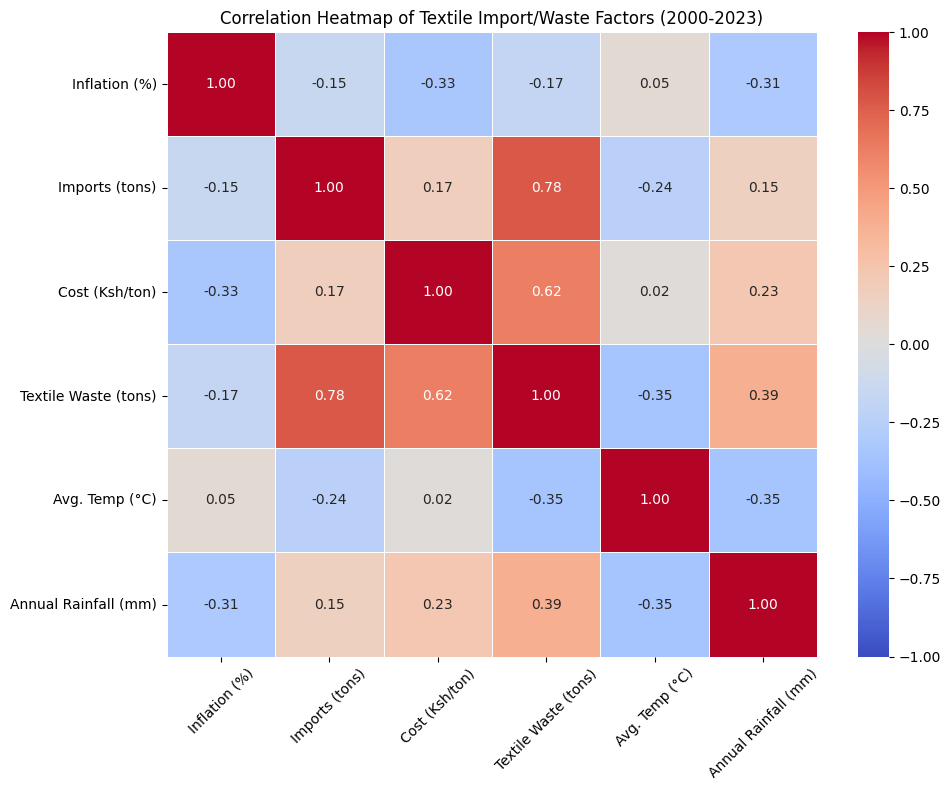

In [ ]:
# Select numerical columns (exclude 'Year' and 'Key Event')
numerical_cols = ['Inflation (%)', 'Imports (tons)', 'Cost (Ksh/ton)', 'Textile Waste (tons)', 'Avg. Temp (°C)', 'Annual Rainfall (mm)']
corr_matrix = df[numerical_cols].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,      # Show correlation values
    cmap='coolwarm', # Color scheme (blue to red)
    fmt=".2f",       # Format to 2 decimal places
    linewidths=0.5,  # Add lines between cells
    vmin=-1,         # Minimum correlation value
    vmax=1           # Maximum correlation value
)

plt.title("Correlation Heatmap of Textile Import/Waste Factors (2000-2023)")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
# Initialize LabelEncoder to convert text events to numerical values
label_encoder = LabelEncoder()

# Create a new column 'Event_Encoded' containing numerical representations of 'Key Event'
df['Event_Encoded'] = label_encoder.fit_transform(df['Key Event'])

In [ ]:
# Define features (input variables) and targets (output variables)
features = ['Inflation (%)', 'Imports (tons)', 'Cost (Ksh/ton)', 'Avg. Temp (°C)', 'Annual Rainfall (mm)', 'Event_Encoded']
target_imports = ['Imports (tons)']  # Target for imports prediction
target_waste = ['Textile Waste (tons)']  # Target for waste prediction

# Initialize scalers for features (X) and targets (y)
scaler_X = MinMaxScaler()  # Scales features to [0,1]
scaler_y_imports = MinMaxScaler()  # Scales imports target
scaler_y_waste = MinMaxScaler()  # Scales waste target

# Apply scaling to features and targets
X_scaled = scaler_X.fit_transform(df[features])  # Scale features
y_scaled_imports = scaler_y_imports.fit_transform(df[target_imports])  # Scale imports
y_scaled_waste = scaler_y_waste.fit_transform(df[target_waste])  # Scale waste

In [ ]:
import numpy as np

# Function to create input sequences (X) and corresponding outputs (y)
def create_sequences(X, y, window_size=3):
    X_seq, y_seq = [], []  # Initialize empty lists for sequences
    for i in range(len(X) - window_size):
        # Sliding window of features (3 years)
        X_seq.append(X[i:i+window_size])
        # Target value (next year)
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)  # Convert to NumPy arrays

# Generate sequences for imports and waste
X_seq, y_seq_imports = create_sequences(X_scaled, y_scaled_imports, window_size=3)
_, y_seq_waste = create_sequences(X_scaled, y_scaled_waste, window_size=3)

# Print out shape and sample values
print("Shape of X_seq:", X_seq.shape)
print("Shape of y_seq_imports:", y_seq_imports.shape)
print("Shape of y_seq_waste:", y_seq_waste.shape)




Shape of X_seq: (21, 3, 6)
Shape of y_seq_imports: (21, 1)
Shape of y_seq_waste: (21, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Function to build the LSTM model
def build_model():
    model = Sequential()  # Initialize Sequential model

    # First LSTM layer (64 units, returns sequences for next LSTM)
    model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])))

    # Second LSTM layer (64 units)
    model.add(LSTM(64, activation='tanh'))

    # Dense layer (128 units)
    model.add(Dense(128))

    # Dropout layer (50% dropout for regularization)
    model.add(Dropout(0.5))

    # Output layer (1 unit for regression)
    model.add(Dense(1))

    # Compile model with Adam optimizer and MSE loss
    model.compile(optimizer='adam', loss='mse')

    return model
  # Print the model summary
    model.summary()

In [ ]:
# Function to train the model with checkpointing and early stopping
def train_model(model, X_seq, y_seq, target_name):
    print(f"Training the {target_name} model...")  # Print when training starts

    # Create checkpoint directory
    checkpoint_dir = f"checkpoints_{target_name}"
    os.makedirs(checkpoint_dir, exist_ok=True)

    # Define checkpoint path
    checkpoint_path = os.path.join(checkpoint_dir, f"best_model_{target_name}.keras")

    # ModelCheckpoint saves the best model based on loss
    checkpoint = ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    # EarlyStopping stops training if loss doesn't improve for 20 epochs
    early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

    print(f"Starting training for {target_name} model...")  # Print status before training

    # Train the model
    history = model.fit(
        X_seq,
        y_seq,
        epochs=200,  # Max epochs
        batch_size=4,  # Batch size
        verbose=1,  # Show progress
        callbacks=[checkpoint, early_stop]  # Apply callbacks
    )

    print(f"Training completed for {target_name} model.")  # Print when training finishes

    # Load the best saved model
    print(f"Loading the best saved model for {target_name}...")  # Print status
    return load_model(checkpoint_path)

# Train imports model
model_imports = build_model()
best_model_imports = train_model(model_imports, X_seq, y_seq_imports, 'imports')

# Train waste model
model_waste = build_model()
best_model_waste = train_model(model_waste, X_seq, y_seq_waste, 'waste')


Training the imports model...
Starting training for imports model...
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - loss: 0.2138
Epoch 1: loss improved from inf to 0.22191, saving model to checkpoints_imports/best_model_imports.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2390
Epoch 2/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1341
Epoch 2: loss improved from 0.22191 to 0.09027, saving model to checkpoints_imports/best_model_imports.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1022
Epoch 3/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0829
Epoch 3: loss improved from 0.09027 to 0.07330, saving model to checkpoints_imports/best_model_imports.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0764
Epoch 4/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0330
Epoch 4: loss improved from 0.07330 to 0.06422, saving model to checkpoints_imports/best_model_imports.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0664
Epoch 5/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0934
Epoch 5: loss did not improve from 0.06422
6

In [ ]:
# Function to predict future values
def forecast_future(model, X_scaled, future_years, scaler_y):
    current_seq = X_scaled[-3:].copy()  # Start with last 3 years of data
    future_preds = []  # Store future predictions

    for _ in range(future_years):
        # Predict next year
        pred = model.predict(current_seq[np.newaxis, :, :])
        future_preds.append(pred[0, 0])

        # Update sequence (slide window forward)
        next_seq = np.vstack([current_seq[1:], current_seq[-1]])
        current_seq = next_seq

    # Inverse transform to original scale
    return scaler_y.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Forecast next 3 years (2024-2026)
future_years = 3
future_preds_imports = forecast_future(best_model_imports, X_scaled, future_years, scaler_y_imports)
future_preds_waste = forecast_future(best_model_waste, X_scaled, future_years, scaler_y_waste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


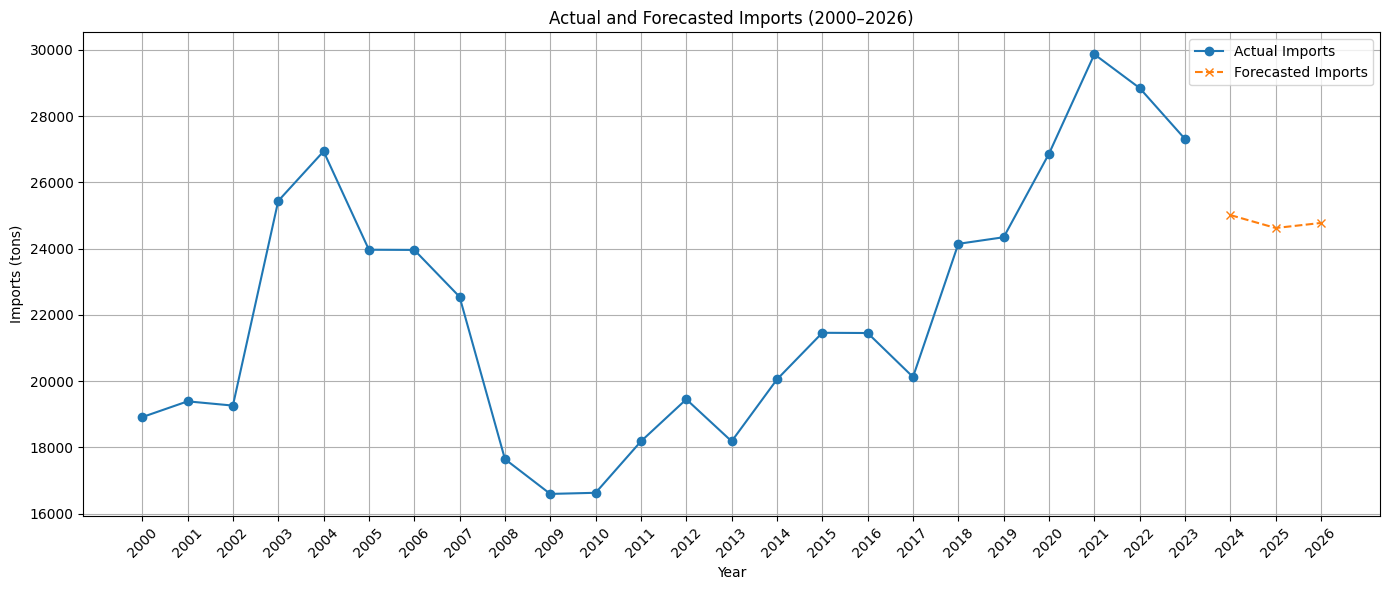

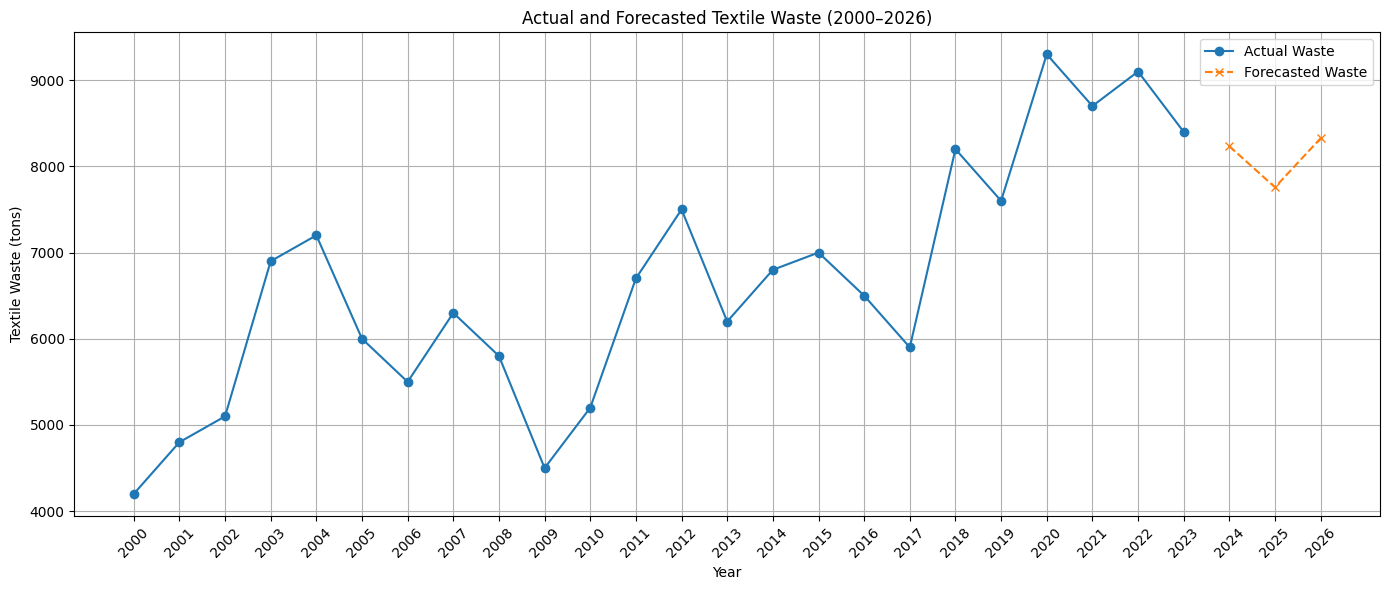

In [ ]:
# Years for forecast (2024-2026)
years_forecast = list(range(2024, 2024 + future_years))

# Combine actual and forecasted data
df_combined = pd.DataFrame({
    'Year': list(df['Year']) + years_forecast,
    'Imports (tons)': list(df['Imports (tons)']) + list(future_preds_imports.flatten()),
    'Textile Waste (tons)': list(df['Textile Waste (tons)']) + list(future_preds_waste.flatten()),
    'Data Type': ['Actual'] * len(df['Year']) + ['Forecasted'] * future_years
})

# Plot imports forecast
plt.figure(figsize=(14, 6))
for dtype, d in df_combined.groupby("Data Type"):
    plt.plot(
        d['Year'],
        d['Imports (tons)'],
        label=f"{dtype} Imports",
        marker='o' if dtype == "Actual" else 'x',  # Different markers
        linestyle='--' if dtype == "Forecasted" else '-'  # Different line styles
    )
plt.xlabel("Year")
plt.ylabel("Imports (tons)")
plt.title("Actual and Forecasted Imports (2000–2026)")
plt.xticks(ticks=range(df_combined['Year'].min(), df_combined['Year'].max() + 1), rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plot waste forecast (similar structure)
plt.figure(figsize=(14, 6))
for dtype, d in df_combined.groupby("Data Type"):
    plt.plot(
        d['Year'],
        d['Textile Waste (tons)'],
        label=f"{dtype} Waste",
        marker='o' if dtype == "Actual" else 'x',
        linestyle='--' if dtype == "Forecasted" else '-'
    )
plt.xlabel("Year")
plt.ylabel("Textile Waste (tons)")
plt.title("Actual and Forecasted Textile Waste (2000–2026)")
plt.xticks(ticks=range(df_combined['Year'].min(), df_combined['Year'].max() + 1), rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):  # Define MAPE manually
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-10, None))) * 100

# ------------------------------
# 9. Evaluate Model Performance on Training Data
# ------------------------------
def evaluate_model(model, X_seq, y_true, scaler_y, label):
    y_pred = model.predict(X_seq)
    y_pred_inv = scaler_y.inverse_transform(y_pred)
    y_true_inv = scaler_y.inverse_transform(y_true)

    mae = mean_absolute_error(y_true_inv, y_pred_inv)
    mape = mean_absolute_percentage_error(y_true_inv, y_pred_inv)
    r2 = r2_score(y_true_inv, y_pred_inv)

    print(f"\nModel Metrics for {label}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.4f}")

# Evaluate both models
evaluate_model(best_model_imports, X_seq, y_seq_imports, scaler_y_imports, "Imports")
evaluate_model(best_model_waste, X_seq, y_seq_waste, scaler_y_waste, "Textile Waste")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step

Model Metrics for Imports:
Mean Absolute Error (MAE): 571.29
Mean Absolute Percentage Error (MAPE): 2.72%
R-squared (R²): 0.9593
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step

Model Metrics for Textile Waste:
Mean Absolute Error (MAE): 554.62
Mean Absolute Percentage Error (MAPE): 8.74%
R-squared (R²): 0.6756


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 3, 64)          │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,825 (585.25 KB)

 Trainable params: 149,825 (585.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.6042
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.5990
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5938
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5882
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5824
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5764
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5700
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5634
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.5563
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5488
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5409
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5325
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5235
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.5140
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5039
Epoch 16/200
1/1 ━━━━

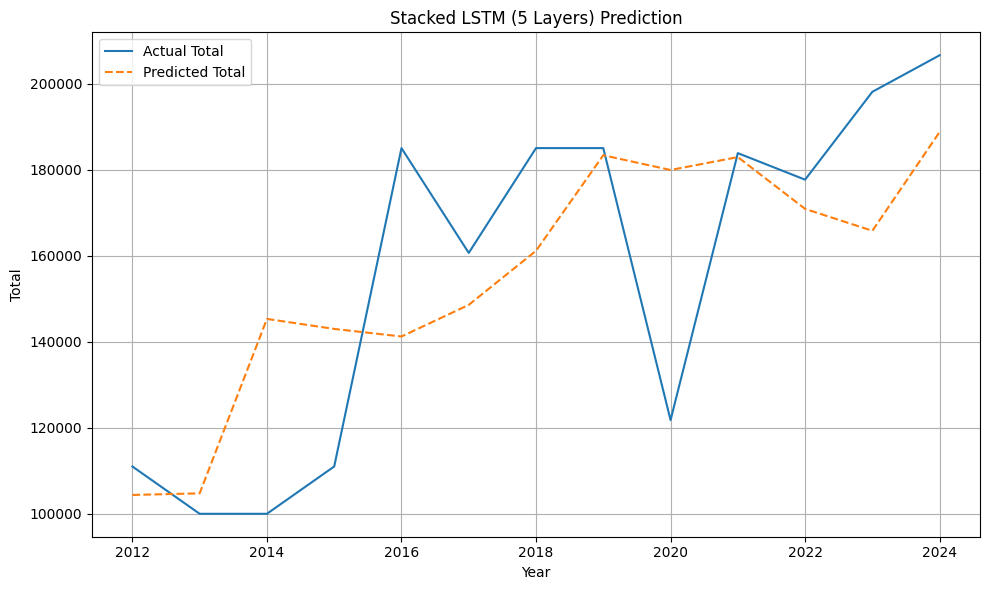

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
🔮 Forecasted Total for 2025: 190,295.50
📏 Model Metrics — MAE: 22,001.83, RMSE: 28,506.86


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load the dataset
data = {
    'Year': list(range(2009, 2025)),
    'Q1': [7211.83, 0.01, 26700, 27000, 24600, 23300, 28000, 45800, 40300, 46000, 46600, 30000, 45900, 44700, 49700, 49200],
    'Q2': [9423.52, 0.02, 27800, 27300, 25100, 25000, 29500, 46500, 40400, 46500, 46500, 30400, 45930, 43700, 48600, 51500],
    'Q3': [4615.57, 0.03, 28200, 28000, 25000, 25500, 25500, 46100, 40000, 46500, 46100, 30700, 46000, 44200, 50600, 53800],
    'Q4': [7596.38, 0.02, 28500, 28900, 25600, 26500, 28200, 46800, 39938, 46400, 46000, 30678, 46100, 45064, 49384, 52080],
    'Total': [28847.3, 0.08, 111000, 111000, 100000, 100000, 111000, 185000, 160638, 185000, 185000, 121778, 183830, 177664, 198084, 206580]
}
df = pd.DataFrame(data)

# 2. Normalize quarterly inputs and target Total
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(df[['Q1', 'Q2', 'Q3', 'Q4']])
y = scaler_y.fit_transform(df[['Total']])

# 3. Convert to sequences for LSTM
def create_dataset(X, y, look_back=3):
    X_seq, y_seq = [], []
    for i in range(len(X) - look_back):
        X_seq.append(X[i:i+look_back])
        y_seq.append(y[i+look_back])
    return np.array(X_seq), np.array(y_seq)

look_back = 3
X_seq, y_seq = create_dataset(X, y, look_back)

# 4. Build the stacked LSTM model (5 LSTM layers)
model = Sequential()

# First LSTM layer with return_sequences=True for passing sequences to the next layer
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(look_back, 4)))

# Second LSTM layer
model.add(LSTM(64, activation='relu', return_sequences=True))

# Third LSTM layer
model.add(LSTM(64, activation='relu', return_sequences=True))

# Fourth LSTM layer
model.add(LSTM(64, activation='relu', return_sequences=True))

# Fifth LSTM layer (final layer, no return_sequences)
model.add(LSTM(64, activation='relu'))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model architecture
model.summary()


# 5. Train the model
model.fit(X_seq, y_seq, epochs=200, verbose=1)

# 6. Make predictions
y_pred_scaled = model.predict(X_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_seq)

# 7. Metrics evaluation
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # No 'squared' arg
print(f"📏 Mean Absolute Error (MAE): {mae:,.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:,.2f}")

# 8. Plot results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'][look_back:], y_true, label='Actual Total')
plt.plot(df['Year'][look_back:], y_pred, label='Predicted Total', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Stacked LSTM (5 Layers) Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Forecast 2025
X_forecast = X[-look_back:].reshape(1, look_back, 4)
forecast_scaled = model.predict(X_forecast)
forecast_2025 = scaler_y.inverse_transform(forecast_scaled)
print(f"🔮 Forecasted Total for 2025: {forecast_2025[0][0]:,.2f}")
print(f"📏 Model Metrics — MAE: {mae:,.2f}, RMSE: {rmse:,.2f}")
